## Crypto Currency Forecasting Using LSTM model

### Background
Simply, crypto currency can be defined as a decentralized digital money
that is based on blockchain technology. Cryptocurrencies are created (and
secured) through cryptographic algorithms. Bitcoin, Ethereum, Litecoin, Monero, Solano, Cardano, etc. are a few most
popular cryptocurrencies, while bitcoin has been valued the most
expensive one.Bitcoin, and other cryptocurrencies created afterward rapidly gained the
popularity and reputation of being pure speculative assets. 

 ### Motivation
 As any good investor it is important to know regarding the high prices, low prices, hold and correct sell of the cryptocurrency to increase the profitability.The objective of this project is to predict the price of crypto currency using the prices of 3-4 cryptocurrencies using deep learning models. For this project I have used Bitcoin, Ethereum, Litecoin, Dogecoin to predict the preice of Bitcoin.

## Importing the libraries

As for this project I will be using deep learning, I have installed the required libraries from keras, pandas_datareader to collect the data, sklearn for normalizing the data, matplolib to make graphs.

In [97]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  #scale the financial data between 0 to 1
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout  #LSTM model important for sequential data 
import matplotlib.pyplot as plt
import datetime as dt
from keras.layers import Dropout
from keras.layers import Dense
from datetime import date
import seaborn as sb

## Data Collection

Using Pandas_datareader, we can collect the data required from various APIs. Similarly, I have used yahoo! finance as my API to collect the data of different cryptocurrencies from we.DataReader, where my start date is the beginning of year 2012 to the most current time. To collect the most current time, either we can manually enter it or use other inbuilt libraries to get the current date. For this project I have used datetime .

Since the cryptocurrencies have been created at different time periods, they do not have the same starting date. Although bitcoin had been created in early 2000's I have kept the start date as 2018, to get the uniform data throughput the datasets.

In [32]:
end_date= dt.datetime.now()
df_btc=web.DataReader('BTC-USD',data_source='yahoo',start='2018-01-01', end=end_date)
df_eth=web.DataReader('ETH-USD',data_source='yahoo',start='2018-01-01',end=end_date) #established in 20
df_ltc=web.DataReader('LTC-USD',data_source='yahoo',start='2018-01-01', end=end_date)
df_doge=web.DataReader('DOGE-USD',data_source='yahoo',start='2018-01-01', end=end_date)

## Data Representation

From above data collected, we are trying to look at shape of each dataframe to see if they have different datalength.

In [69]:
df_btc.shape

(1569, 6)

In [70]:
df_eth.shape

(1569, 6)

In [71]:
df_ltc.shape

(1569, 6)

In [72]:
df_doge.shape  #the length of all the datasets are same

(1569, 6)

After verifying the datasets have same shape, we move forward to creating a separate dataframe with closing prices of the cyptocurrency only.

In [73]:
close_btc= df_btc['Close'].values
close_btc= close_btc.tolist()

close_eth=df_eth['Close'].values
close_eth=close_eth.tolist()

close_ltc=df_ltc['Close'].values
close_ltc=close_ltc.tolist()

close_doge= df_doge['Close'].values
close_doge= close_doge.tolist()

In [83]:
# Creating a dictionary of all the close lists then making a dataframe'
inde=[]
for i in range(1,(len(df_btc)+1)):
    inde.append(i)

In [90]:
data={'BTC':close_btc, 'ETH':close_eth, 'LTC':close_ltc, 'DOGE':close_doge}

In [92]:
df= pd.DataFrame(data, index=inde)  #dataframe of the closing prices only
df

,BTC,ETH,LTC,DOGE
1,13657.200195,772.640991,229.033005,0.008909
2,14982.099609,884.443970,255.684006,0.009145
3,15201.000000,962.719971,245.367996,0.009320
4,15599.200195,980.921997,241.369995,0.009644
5,17429.500000,997.719971,249.270996,0.012167
...,...,...,...,...
1565,39935.515625,3019.909424,107.411041,0.143920
1566,40553.464844,3040.916504,111.109344,0.146026
1567,40424.484375,3062.310303,114.430710,0.143712
1568,39716.953125,2993.403320,109.042786,0.139459


Here is the graph plotted with all four crypto currencies closing price used for predictions.

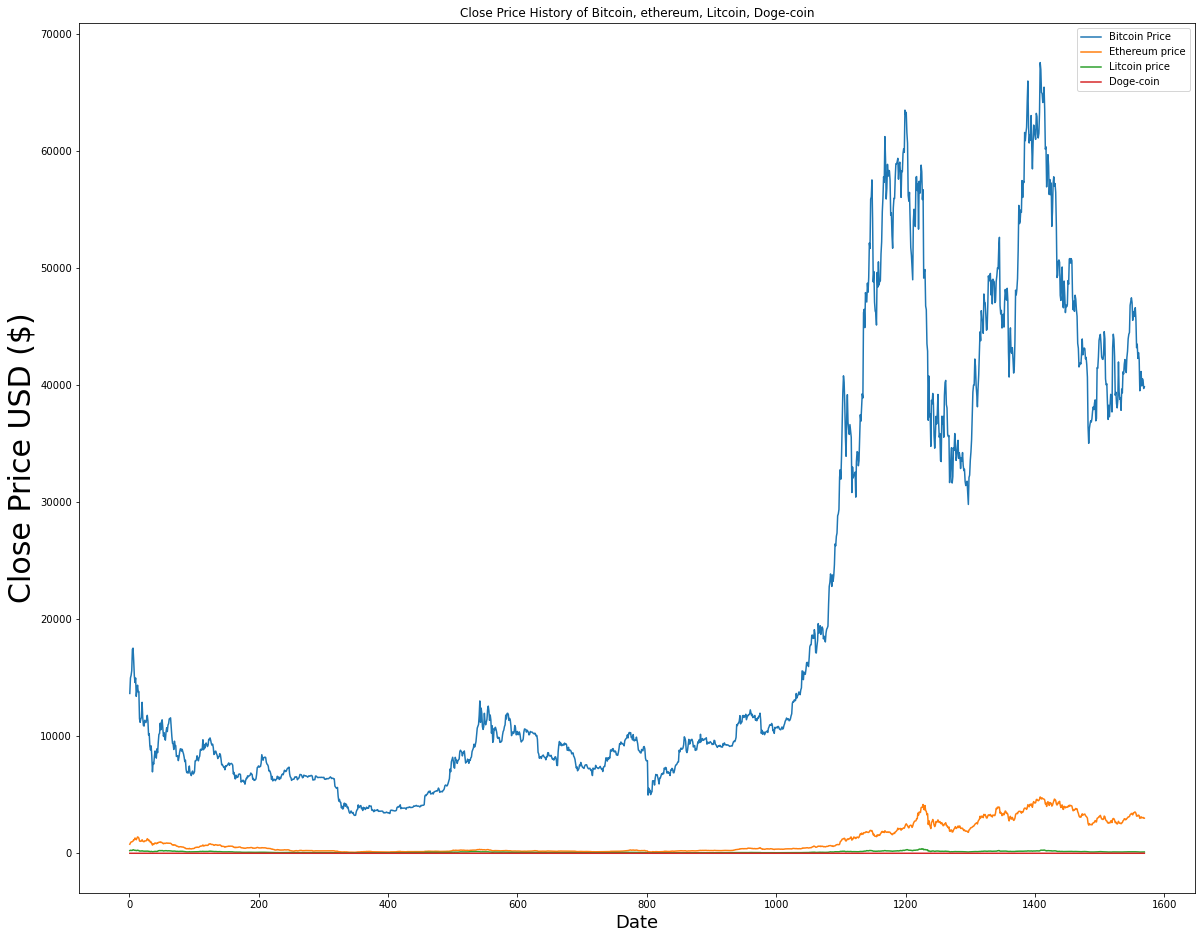

In [93]:
plt.figure(figsize=(20,16))
plt.title('Close Price History of Bitcoin, ethereum, Litcoin, Doge-coin')
plt.plot(df)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=30)
plt.legend(['Bitcoin Price','Ethereum price','Litcoin price','Doge-coin'])
plt.show()

### Separate plots 

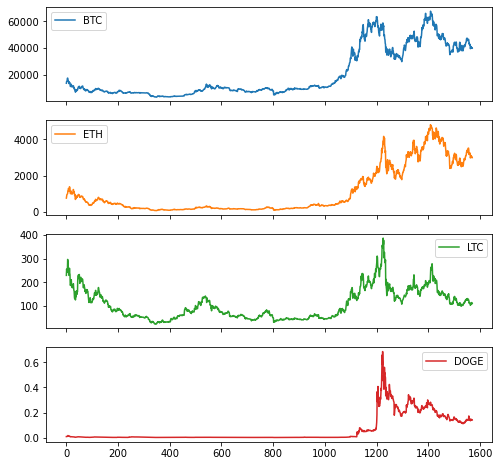

In [94]:
df.plot(subplots=True, figsize=(8, 8))
plt.legend(loc='best')


## Correlation

In [96]:
df.corr()  #hence there is some correlartion between them

,BTC,ETH,LTC,DOGE
BTC,1.000000,0.926175,0.755405,0.793199
ETH,0.926175,1.000000,0.725127,0.858480
LTC,0.755405,0.725127,1.000000,0.679489
DOGE,0.793199,0.858480,0.679489,1.000000


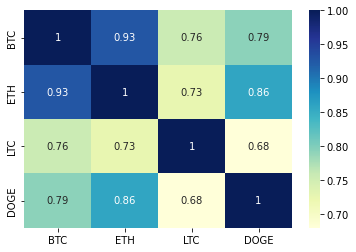

In [99]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Testing data and training data

To separate the training and testing dataset.

In [14]:
split_ratio= 0.2
X= df.values  #convert to numpy array
split= int(len(X)* (1-split_ratio))
train_set= X[: split]
test_set= X[split:]
print(train_set.shape,test_set.shape)

(1249, 4) (313, 4)


In [15]:
def supervisedSeries(data,n,h):
    x,y= list(), list()
    for i in range(len(data)-n-h+1):
        x.append(data[i:(i+n)])
        y.append(data[i+h+n-1])
    return np.array(x), np.array(y)

In [16]:
h=1
n=4
trainX, trainY= supervisedSeries(train_set,n,h)
testX, testY= supervisedSeries(test_set,n,h)
print("TrainX: ", trainX.shape)
print("TrainY: ", trainY.shape)
print("testX:", testX.shape)
print("testY:", testY.shape)

TrainX:  (1245, 4, 4)
TrainY:  (1245, 4)
testX: (309, 4, 4)
testY: (309, 4)


In [17]:
testX


array([[[3.92087656e+04, 2.85512646e+03, 1.93086182e+02, 3.99962991e-01],
        [3.68944062e+04, 2.68819507e+03, 1.78872009e+02, 3.76323014e-01],
        [3.55519570e+04, 2.63057690e+03, 1.73028717e+02, 3.72177005e-01],
        [3.58623789e+04, 2.71509277e+03, 1.76639435e+02, 3.71807009e-01]],

       [[3.68944062e+04, 2.68819507e+03, 1.78872009e+02, 3.76323014e-01],
        [3.55519570e+04, 2.63057690e+03, 1.73028717e+02, 3.72177005e-01],
        [3.58623789e+04, 2.71509277e+03, 1.76639435e+02, 3.71807009e-01],
        [3.35607070e+04, 2.59026318e+03, 1.61732803e+02, 3.31050009e-01]],

       [[3.55519570e+04, 2.63057690e+03, 1.73028717e+02, 3.72177005e-01],
        [3.58623789e+04, 2.71509277e+03, 1.76639435e+02, 3.71807009e-01],
        [3.35607070e+04, 2.59026318e+03, 1.61732803e+02, 3.31050009e-01],
        [3.34726328e+04, 2.51743872e+03, 1.61161072e+02, 3.27686995e-01]],

       ...,

       [[4.55559922e+04, 3.41179248e+03, 1.23213173e+02, 1.72906995e-01],
        [4.32067383

In [18]:
def  predict_crypto(i, testY = testY, trainY = trainY):
    x = np.reshape(testY[:, i], (testY [:, i].shape[0], 1))
    y = np.reshape(trainY[:, i], (trainY[:, i].shape[0], 1))
    return x, y

In [19]:
testY_btc, trainY_btc =  predict_crypto(0)
print(trainY_btc.shape)
print(testY_btc.shape)

(1245, 1)
(309, 1)


In [20]:
# testY = np.reshape(testY[:, 1], (testY [:, 1].shape[0], 1))
# trainY = np.reshape(trainY[:, 1], (trainY[:, 1].shape[0], 1))
# print( trainY.shape)
# print(testY.shape)

In [21]:
scaler = MinMaxScaler()


In [22]:
def scale(data):
    scaled_data = scaler.transform(data)
    return scaled_data

In [23]:
# ##Data Scaling
# scalers = {}
# for i in range (trainX.shape[2]):
# scalers[i] = MinMaxScaler()
# trainX[:, :, i] = scalers[i].fit_transform(trainX[:, :, i])
# for i in range(testX.shape[2]):
# testX[:, :, i] = scalers[i].transform(testX[:, :, i])
# # The target values are 2D arrays, which is easy to scale
# scalerY = MinMaxScaler()
# trainY = scalerY.fit_transform(trainY)
# testY = scalerY.transform(testY)

In [24]:
##Data Scaling
scalers = {}
for i in range (trainX.shape[2]):
  scalers[i] = MinMaxScaler()
  trainX[:, :, i] = scalers[i].fit_transform(trainX[:, :, i])
for i in range(testX.shape[2]):
  testX[:, :, i] = scalers[i].transform(testX[:, :, i])
# The target values are 2D arrays, which is easy to scale
trainY_btc = scaler.fit_transform(trainY_btc)

testY_btc = scale(testY_btc)


In [25]:
def train_model(y):
    model= Sequential()
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # Fit model
    history = model.fit(trainX, y, epochs =60, verbose =1)
    return history, model

In [26]:
history, model = train_model(trainY_btc)
predictions_btc = model.predict(testX)

Epoch 1/60
39/39 [==============================] - 12s 15ms/step - loss: 0.0296
Epoch 2/60
39/39 [==============================] - 1s 15ms/step - loss: 0.0049
Epoch 3/60
39/39 [==============================] - 1s 15ms/step - loss: 0.0026
Epoch 4/60
39/39 [==============================] - 1s 15ms/step - loss: 0.0019
Epoch 5/60
39/39 [==============================] - 1s 15ms/step - loss: 0.0015
Epoch 6/60
39/39 [==============================] - 1s 15ms/step - loss: 0.0014
Epoch 7/60
39/39 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 8/60
39/39 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 9/60
39/39 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 10/60
39/39 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 11/60
39/39 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 12/60
39/39 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 13/60
39/39 [=================

In [27]:
def plot_graph(predictions,y):
    # Descale
    predictions = scaler.inverse_transform(predictions)
    y = scaler.inverse_transform(y)
    # Mean absolute error
    mae = mean_absolute_error(y, predictions)
    print("Test MAE: %.6f" % mae)
    plt.figure(figsize=(15,6))
    plt.plot(predictions, label="Test set predictions" )
    plt.plot(y, label="Real data")
    plt.legend()
    plt.ylabel('Price Index')
    plt.xlabel('time step' )
    plt.title ("Bitcoin close Price prediction- with MAE {:10.4f}".format(mae))
    plt.show()

Test MAE: 3468.662609


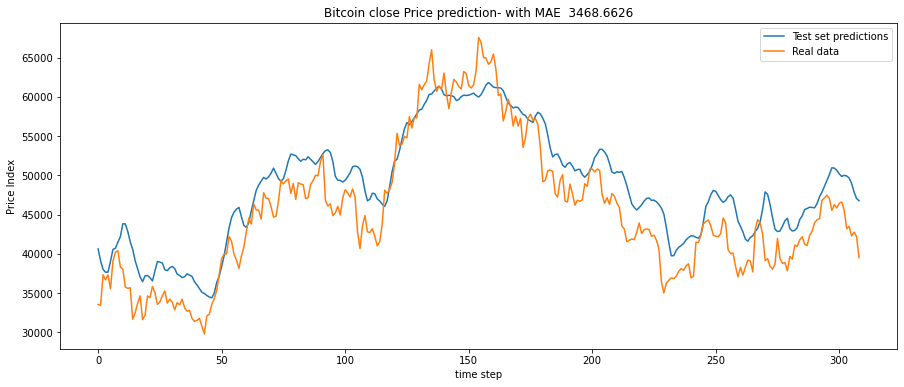

In [28]:
plot_graph(predictions_btc, testY_btc)